In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import jn_zeros

%load_ext autoreload
%autoreload 2

In [2]:
def Jmk(m, a, n=1):
    x_zeros = jn_zeros(m, n)
    km_n = x_zeros / a
    return km_n

In [10]:
# define physical parameters
omega = 2 * np.pi /(9.925*3600)  # rotation rate of Jupiter in rad/s
a = 6.99e7 # radius of Jupiter in m
gamma = 2 * omega / ( a**2 )
# gamma = 0 
H1 = 1e5
delta = 1
H2 = delta * H1
f0 = 2 * omega # Coriolis parameter 
g0 = 24 # gravity at the surface of Jupiter in m/s^2
p0 = 1e4 # reference pressure in Pa
T0 = 110 # reference temperature in K
Rd = 8.315/0.002 # gas constant 
# rho1 = p0 / g0 / H1 * np.exp(g0 * H1 / Rd / T0) # density at the surface of Jupiter
# p1 = rho1 * g0 * H1 # pressure at the surface of Jupiter
# rho2 = p1 / g0 / H2 * (np.exp(g0 * (H1 + H2) / Rd / T0) - 1) # density at the surface of Jupiter
rho1 = p0 / Rd / T0 * np.exp(g0 * H1 / Rd / T0) # density at the surface of Jupiter
rho2 = p0 / Rd / T0 * (np.exp(g0 * (H1 + H2) / Rd / T0)) # density at the surface of Jupiter
gprime = g0 * (rho2 - rho1) / rho2 # reduced gravity
F1 = f0**2 / gprime / H1
F2 = f0**2 / gprime / H2
# find some k 
n = 1
m = 20
k = np.asarray([Jmk(i, a, n=n) for i in range(m)]).reshape(m, n)
u0 = 5000


In [11]:
rho1

4.158272948079287

In [12]:
rho2

790.7713548223685

In [13]:
gprime 

23.873795946014862

In [18]:
F1 * 1e14

5.181222204917299

In [17]:
F2 * 1e14

5.181222204917299

In [14]:
AA = (k**2 + F1) * (k**2 + F2) - F1 * F2
BB = (k**2 + F1) * (gamma - 2 * F2 * u0 + (k**2 + F2) * u0) + (k**2 + F2) * (gamma + 2 * F1 * u0 - (k**2 + F1) * u0)
CC = (gamma + 2 * F1 * u0 - (k**2 + F1) * u0) * (gamma - 2 * F2 * u0 + (k**2 + F2) * u0) - F1 * F2 * u0**2

In [15]:
BB

array([[8.02856764e-33],
       [8.29076753e-33],
       [8.63528436e-33],
       [9.05756601e-33],
       [9.55482069e-33],
       [1.01251323e-32],
       [1.07670874e-32],
       [1.14795766e-32],
       [1.22617182e-32],
       [1.31127820e-32],
       [1.40321545e-32],
       [1.50193086e-32],
       [1.60737878e-32],
       [1.71951909e-32],
       [1.83831638e-32],
       [1.96373854e-32],
       [2.09575714e-32],
       [2.23434675e-32],
       [2.37948268e-32],
       [2.53114497e-32]])

In [16]:
AA 

array([[1.30615623e-28],
       [3.37071079e-28],
       [6.18430600e-28],
       [9.78920550e-28],
       [1.42547757e-27],
       [1.96702008e-27],
       [2.61413590e-27],
       [3.37891870e-27],
       [4.27487083e-27],
       [5.31683996e-27],
       [6.52097505e-27],
       [7.90469399e-27],
       [9.48665894e-27],
       [1.12867569e-26],
       [1.33260839e-26],
       [1.56269318e-26],
       [1.82127777e-26],
       [2.11082740e-26],
       [2.43392404e-26],
       [2.79326569e-26]])

In [17]:
CC

array([[-1.45777809e-19],
       [-1.40997846e-19],
       [-1.34969299e-19],
       [-1.27970606e-19],
       [-1.20280840e-19],
       [-1.12195704e-19],
       [-1.04033691e-19],
       [-9.61388946e-20],
       [-8.88824218e-20],
       [-8.26631405e-20],
       [-7.79080797e-20],
       [-7.50726398e-20],
       [-7.46406922e-20],
       [-7.71246137e-20],
       [-8.30652803e-20],
       [-9.30320367e-20],
       [-1.07622652e-19],
       [-1.27463263e-19],
       [-1.53208318e-19],
       [-1.85540516e-19]])

In [8]:
BB**2 - 4 * AA * CC 

array([[7.61634375e-49],
       [1.90105184e-48],
       [3.33876579e-48],
       [5.01092224e-48],
       [6.85830557e-48],
       [8.82764817e-48],
       [1.08783283e-47],
       [1.29938204e-47],
       [1.51984349e-47],
       [1.75802676e-47],
       [2.03214658e-47],
       [2.37370498e-47],
       [2.83236316e-47],
       [3.48194706e-47],
       [4.42773956e-47],
       [5.81522118e-47],
       [7.84042973e-47],
       [1.07621179e-46],
       [1.49158964e-46],
       [2.07305583e-46]])

In [9]:
# eigenvalues = []
# for i in range(len(AA)):
#     eigenvalues.append( np.roots([AA[i], BB[i], CC[i]]) )
eigenvalues = np.empty(k.shape + (2,), dtype=np.complex128)

# Loop through each element of the k array
for i in range(k.shape[0]):
    for j in range(k.shape[1]):
        # Get coefficients at this (i, j)
        a = AA[i, j]
        b = BB[i, j]
        c = CC[i, j]
        
        # Compute roots and store
        eigenvalues[i, j, :] = np.roots([a, b, c])

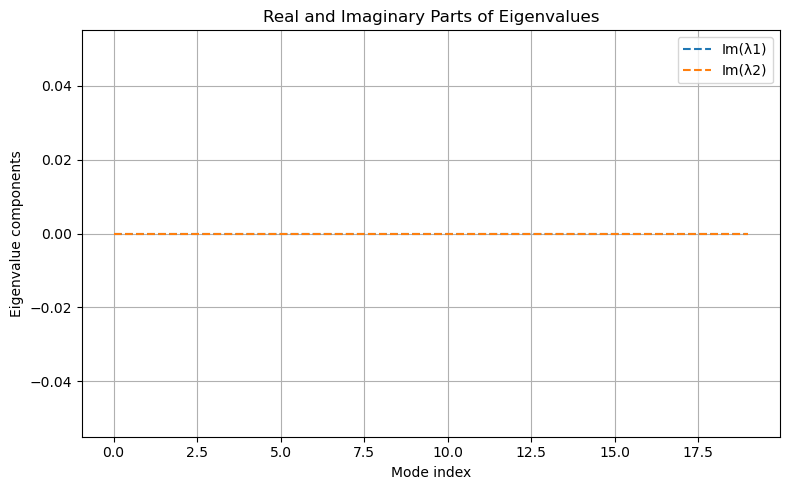

In [10]:
cr = np.real(eigenvalues)  # shape (m, n, 2)
ci = np.imag(eigenvalues)

plt.figure(figsize=(8, 5))

# Plot both roots
for root_idx in range(2):
    # plt.plot(cr[:, :, root_idx].flatten(), linestyle='-', label=f'Re(λ{root_idx+1})')
    plt.plot(ci[:, :, root_idx].flatten(), linestyle='--', label=f'Im(λ{root_idx+1})')

plt.xlabel("Mode index")
plt.ylabel("Eigenvalue components")
plt.legend()
plt.grid(True)
plt.title("Real and Imaginary Parts of Eigenvalues")
plt.tight_layout()
plt.show()




In [11]:
cr = np.array([np.real(eigenvalues[i]) for i in range(len(eigenvalues))])
ci = np.array([np.imag(eigenvalues[i]) for i in range(len(eigenvalues))])
    

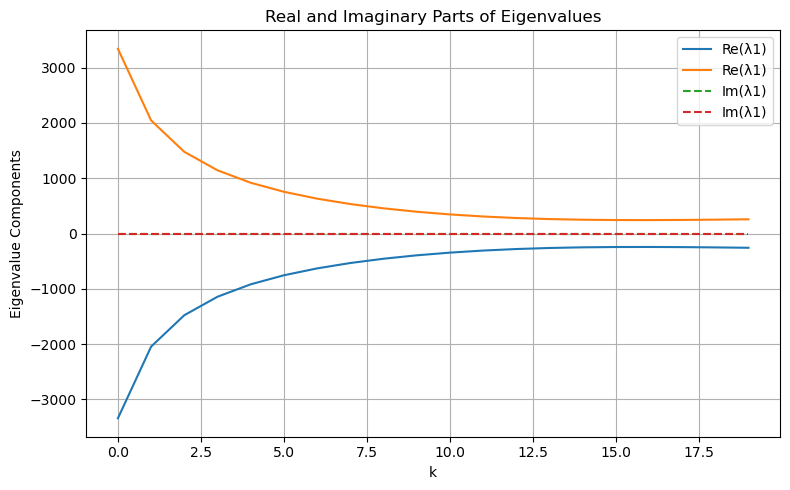

In [12]:
plt.figure(figsize=(8, 5))

# Plot each root (assuming 2 roots per polynomial)
for j in range(cr.shape[1]):
    plt.plot(cr[:, j], label=f'Re(λ{j+1})', linestyle='-')
    plt.plot(ci[:, j], label=f'Im(λ{j+1})', linestyle='--')

plt.xlabel('k')
plt.ylabel('Eigenvalue Components')
plt.title('Real and Imaginary Parts of Eigenvalues')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()